<a href="https://colab.research.google.com/github/anferivera/Programming/blob/main/5_2_Monte_Carlo_integration_Marckov_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MCMC: Monte Carlo Marckov Chain

El método de Monte Carlo es una técnica computacional que utiliza muestreo aleatorio para aproximar soluciones a problemas matemáticos, incluyendo integrales definidas. En Python, se puede implementar este método para calcular integrales generando un gran número de puntos aleatorios dentro de un intervalo dado, evaluando la función en esos puntos, y luego calculando el promedio de los resultados multiplicados por el ancho del intervalo.

El **método de Monte Carlo** es especialmente útil cuando no hay una solución analítica disponible o cuando la función es muy compleja para ser integrada analíticamente.

A **Markov Chain** is a random walk that maintains the** memoryless property**. In other words, each step, or probability, in the system is independent of the previous. In our scenario, each step the drunk man takes maintains the same probability of moving forwards or backwards whether he’s on the cliff’s edge or many steps away from it. Later we will see the Metropilis-Hastings method...

$\int_a^b f(x) dx = \langle f(x) \rangle (b-a) \approx (b-a)\times \sum_{i=1}^N f(x_i)/N$

In [ ]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

INTRODUTION: In the following example we show how to comute the $\pi$ number using a random set of points..

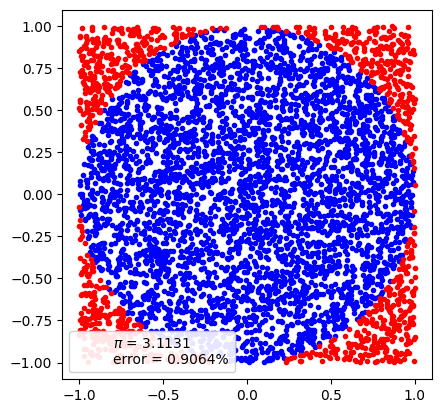

In [ ]:
N=5000
xmenor=[]
ymenor=[]
xmayor=[]
ymayor=[]
k=0

x, y = np.random.uniform(-1, 1, size=(2, N))

for i in range(N):

  if x[i]**2+y[i]**2 <= 1:
    xmenor.append(x[i])
    ymenor.append(y[i])

    #Radio sqared
    k += x[i]**2+y[i]**2

  else:
    xmayor.append(x[i])
    ymayor.append(y[i])
#Pi value
pi = k*8/N
error = abs((pi - np.pi) / np.pi) * 100

plt.plot(xmenor, ymenor, 'b.')
plt.plot(xmayor, ymayor, 'r.')
plt.plot(0, 0, label='$\pi$ = {:4.4f}\nerror = {:4.4f}%'.format(pi,error), alpha=0)
plt.axis('square')
plt.legend(frameon=True, framealpha=0.9, fontsize=10)
plt.show()

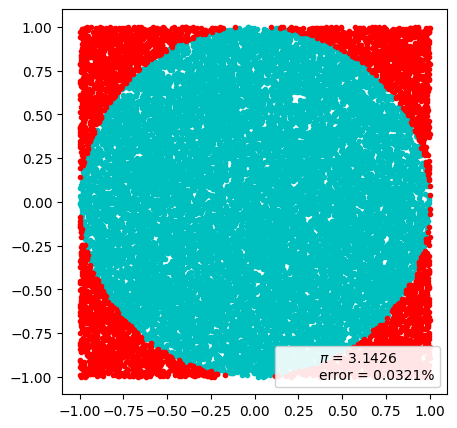

In [ ]:
# Ejemplo: Aproximando el valor de pi - área de un círculo de radio = 1.

def mc_pi_aprox(N=20000):
    plt.figure(figsize=(5,5))  # tamaño de la figura
    x, y = np.random.uniform(-1, 1, size=(2, N))
    interior = (x**2 + y**2) <= 1
    pi = interior.sum() * 4 / N
    error = abs((pi - np.pi) / np.pi) * 100
    exterior = np.invert(interior)
    plt.plot(x[interior], y[interior], 'c.')
    plt.plot(x[exterior], y[exterior], 'r.')
    plt.plot(0, 0, label='$\pi$ = {:4.4f}\nerror = {:4.4f}%'.format(pi,error), alpha=0)
    plt.axis('square')
    plt.legend(frameon=True, framealpha=0.9, fontsize=10)

mc_pi_aprox()

# Monte Carlo Integration method

In [ ]:
def monte_carlo_integration(func, a, b, num_samples):
    """
    Aproxima la integral definida de una función utilizando el método de Monte Carlo.

    Args:
        func: La función a integrar (debe ser una función de Python).
        a: El límite inferior de integración.
        b: El límite superior de integración.
        num_samples: El número de puntos aleatorios a generar.

    Returns:
        Una aproximación de la integral definida.
    """
    integral_sum = 0
    for _ in range(num_samples):
        # Generar un punto aleatorio en el intervalo [a, b]
        x = random.uniform(a, b)
        # Sumar el valor de la función en ese punto
        integral_sum += func(x)
    # Calcular el promedio y multiplicar por el ancho del intervalo
    integral_approx = (b - a) * (integral_sum / num_samples)
    return integral_approx

# Example 1:

$\int_0^2 x^2 dx = (x^{3}/3)_0^2=8/3≈2.6666666$

In [ ]:
# Ejemplo de uso
def my_function(x):
    return x**2  # Ejemplo: f(x) = x^2

# Definir los límites de integración y el número de muestras
a = 0
b = 2
num_samples = 20000

# Calcular la aproximación de la integral
integral_result = monte_carlo_integration(my_function, a, b, num_samples)

print(f"Aproximación de la integral: {integral_result}")
print(f"Analytical value: {8/3}")

Aproximación de la integral: 2.6431183277545816
Analytical value: 2.6666666666666665


In [ ]:
for i in range(500,10000,1000):
    # Calcular la aproximación de la integral
    integral_result = monte_carlo_integration(my_function, a, b, i)
    print(f"Aproximación de la integral: {integral_result}")

print(f"Analytical value: {8/3}")

Aproximación de la integral: 2.5202217935106557
Aproximación de la integral: 2.692177015459935
Aproximación de la integral: 2.74594243777569
Aproximación de la integral: 2.6192741135744666
Aproximación de la integral: 2.641129420630043
Aproximación de la integral: 2.7072552358294
Aproximación de la integral: 2.7091369825360654
Aproximación de la integral: 2.704028211715655
Aproximación de la integral: 2.64414189952487
Aproximación de la integral: 2.7158117141461675
Analytical value: 2.6666666666666665


# Example 2:

$\int_0^{\pi}\, \sin(x) dx = (-\cos(x))_0^{\pi}=2$ ... using Monte Carlo

https://www.geeksforgeeks.org/python/monte-carlo-integration-in-python/

In [ ]:
def my_function(x):
    return np.sin(x)

integral_result = monte_carlo_integration(my_function, 0, np.pi, 2000)

print(f"Aproximation with MCMC= {integral_result}")
print(f"Analytical value= {2.0}")

Aproximation with MCMC= 2.0028651224671363
Analytical value= 2.0


In [ ]:
for i in range(10):
  print(monte_carlo_integration(my_function, 0, np.pi, 2000))

1.9960474350205446
2.0125452754299014
2.0431495827382333
1.99830568300382
1.9964719983051633
1.9799670559956164
2.000316619016565
2.0017898691074576
2.0115365672392667
1.9813732194848996


The value obtained is very close to the actual answer of the integral which is 2.0.

- - -

Now if we want to visualize the integration using a histogram, we can do so by using the matplotlib library. Again we import the modules, define the limits of integration and write the sin function for calculating the sin value for a particular value of x. Next, we take an array that has variables representing every beam of the histogram. Then we iterate through N values and repeat the same process of creating a zeros array, filling it with random x values, creating an integral variable adding up all the function values, and getting the answer N times, each answer representing a beam of the histogram. The code is as follows:

The value of the integral is= 2.012253358956329


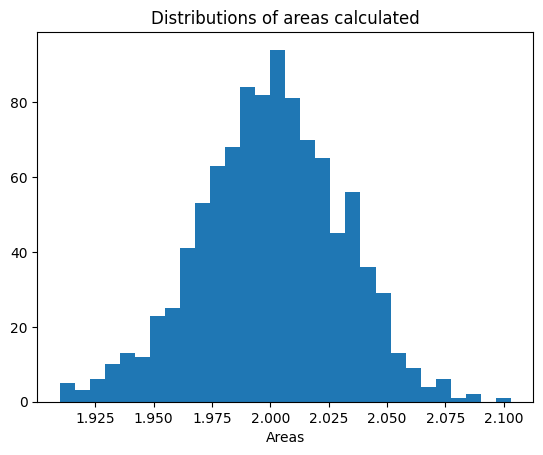

In [ ]:
# importing the modules
#from scipy import random
#import numpy as np
import matplotlib.pyplot as plt

# limits of integration
a, b, N = 0, np.pi, 1000

# function
def f(x):
    return np.sin(x)

# list to store all the values for plotting
plt_vals = []

# we iterate through all the values to generate
# multiple results and show whose intensity is the most.
for i in range(N):

    #Compute the value of the integral for i-esimo time
    ans = monte_carlo_integration( f, a, b, N)

    # appends the solution to a list for plotting the graph
    plt_vals.append(ans)

print('The value of the integral is=',ans)

# details of the plot to be generated
plt.title("Distributions of areas calculated")
plt.hist (plt_vals, bins=30, ec="black")
plt.xlabel("Areas")
plt.show()

In summary, the algorith compute the integral N times and in the mayority of cases the value is near the central value 2. The histogram show that

# Metodo de Metropolis-Hastings


Uno de los métodos MCMC más populares es el algoritmo Metropolis-Hastings; de hecho la mayoría de los algoritmos de MCMC pueden ser interpretados como casos especiales de este algoritmo. El algoritmo Metropolis-Hastings esta catalogado como uno de los 10 algoritmos más importantes y más utilizados en ciencia e ingeniería en los últimos veinte años.Se encuentra en el corazón de la mayoría de los métodos de muestreo MCMC. El problema básico que intenta resolver el algoritmo Metropolis-Hastings es proporcionar un método para generar muestras de alguna distribución genérica $P(x)$,
. La idea es que en muchos casos, podemos saber cómo escribir la ecuación para la distribución de probabilidad $P(x)$, pero no sabemos cómo generar muestras aleatorias de la misma. Entonces la idea básica detrás de este algoritmo es la de construir una cadena de Markov cuya distribución invariante sea la distribución de muestreo que deseamos, es decir $P(x)$. En principio, esto puede parecer bastante complicado, pero la flexibilidad inherente en la elección de las probabilidades de transición lo hacen más simple de lo que parece.

¿cómo funciona? ver:
https://relopezbriega.github.io/blog/2017/01/10/introduccion-a-los-metodos-de-monte-carlo-con-python/

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

Normal distribution:

$p(x;\mu,\sigma^2)=\dfrac{1}{\sigma \sqrt{2\pi}} e^{-\dfrac{1}{2}\left(\dfrac{x-μ}{\sigma}\right)^2}$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

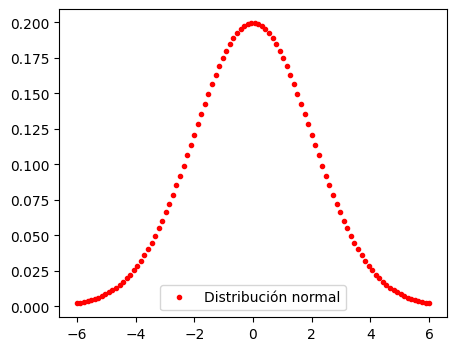

In [ ]:
x = np.linspace(-6, 6, 100)
y = norm(0, 2).pdf(x) #mu=mean es 1 y sigma es 2
plt.figure(figsize=(5,4))
plt.plot(x, y, 'r.', lw=3, label='Distribución normal')
plt.legend(fontsize=10)
plt.show()

In [ ]:
norm(0, 2).pdf(4)

np.float64(0.02699548325659403)

In [ ]:
# Ejemplo algoritmo metropolis
def metropolis(func, steps=10000):
    """A very simple Metropolis implementation"""
    muestras = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x)

    for i in range(steps):
        new_x = old_x + np.random.normal(0, 0.5)
        new_prob = func.pdf(new_x)
        aceptacion = new_prob / old_prob
        if aceptacion >= np.random.random():
            muestras[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            muestras[i] = old_x

    return muestras

In [ ]:
norm(0.4, 2).pdf(0.1)

np.float64(0.19723966545394447)

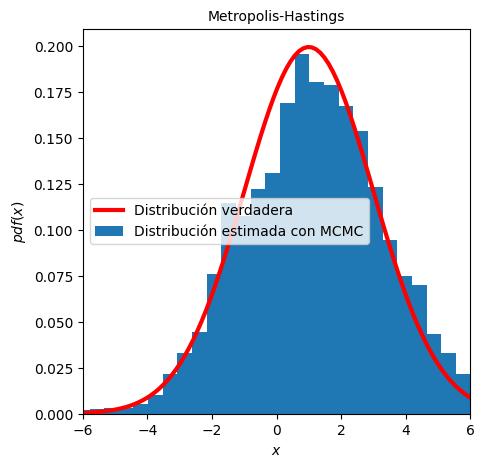

In [ ]:
# distribución normal
func = norm(1, 2)
samples = metropolis(func=func)#read the normal distribution
x = np.linspace(-6, 7, 100)
y = func.pdf(x)
plt.figure(figsize=(5,5))
plt.xlim(-6, 6)
plt.plot(x, y, 'r-', lw=3, label='Distribución verdadera')
plt.hist(samples, bins=30, density=True, label='Distribución estimada con MCMC')
plt.xlabel('$x$', fontsize=10)
plt.ylabel('$pdf(x)$', fontsize=10)
plt.title('Metropolis-Hastings', fontsize=10)
plt.legend(fontsize=10)
plt.show()

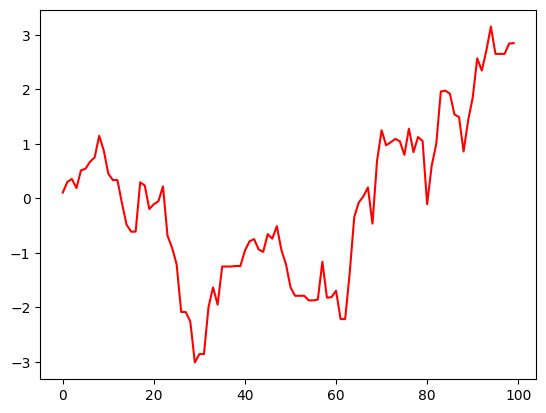

In [ ]:
samples = metropolis(func=func, steps=100)

xb = np.arange(len(samples))

plt.plot(xb, samples, 'r-')
plt.show()


# The Drunkard’s Walk ... teh random walk